In [1]:
#importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
#Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0,x_test / 255.0 #normalize to range 0-1
print("x_train.shape:",x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# the data is only 2D!
# convolution expects H*W*color
#this is to expand dimension form (feature map *height *weight) to (feature map * height *weight* color)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
#number of classws
K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [5]:
#Build the model
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x)

In [6]:
#Compile and fit
#use GPU for this

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 28s 14ms/step - loss: 0.5151 - accuracy: 0.8087 - val_loss: 0.4080 - val_accuracy: 0.8426
Epoch 2/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3573 - accuracy: 0.8674 - val_loss: 0.3425 - val_accuracy: 0.8722
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3075 - accuracy: 0.8845 - val_loss: 0.3150 - val_accuracy: 0.8815
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2755 - accuracy: 0.8958 - val_loss: 0.3139 - val_accuracy: 0.8865
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2489 - accuracy: 0.9066 - val_loss: 0.3045 - val_accuracy: 0.8914
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2268 - accuracy: 0.9140 - val_loss: 0.3028 - val_accuracy: 0.8931
Epoch 7/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2090 - accuracy: 0.9205 - val_loss: 0.2914 -

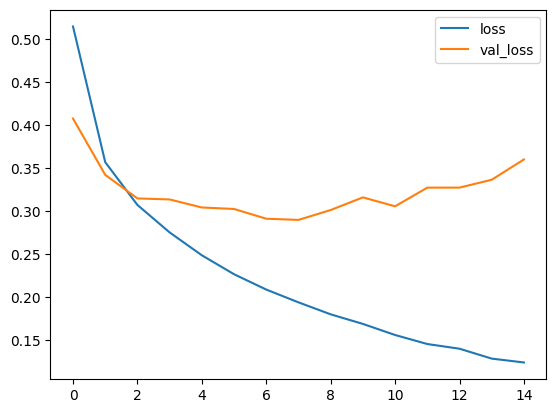

In [7]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

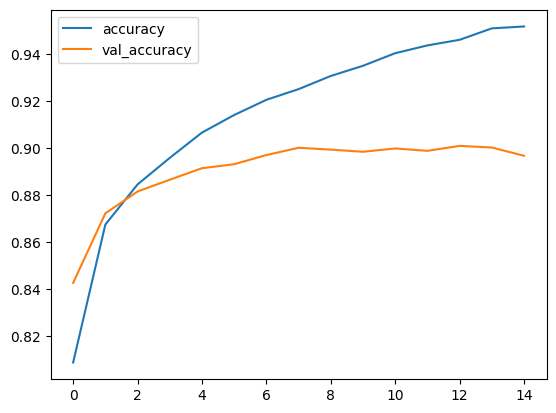

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[848   1  22  14   1   0 107   0   7   0]
 [  1 979   1  12   3   0   2   0   2   0]
 [ 29   1 863   9  38   0  58   0   2   0]
 [ 24   6  20 901  24   0  24   0   1   0]
 [  0   1  70  24 790   0 112   0   3   0]
 [  0   0   0   2   0 959   0  18   3  18]
 [ 98   1  74  20  66   0 726   0  15   0]
 [  0   0   0   0   0   6   0 942   0  52]
 [  1   0   5   4   1   2   7   1 979   0]
 [  0   0   0   0   0   4   1  14   1 980]]


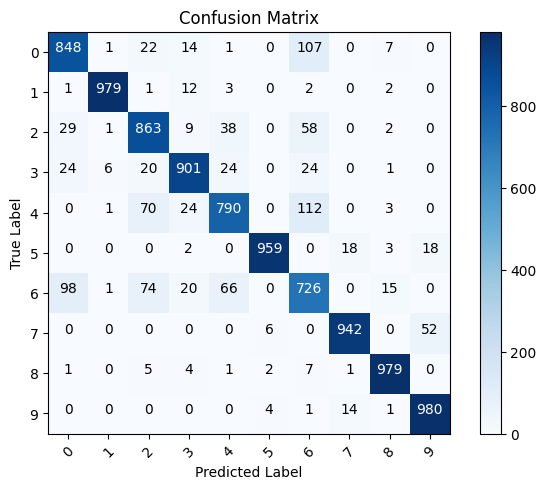

In [9]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize = True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [10]:
# Label mapping
labels='''T-shirt/top
trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Shirt  Predicted label: T-shirt/top')

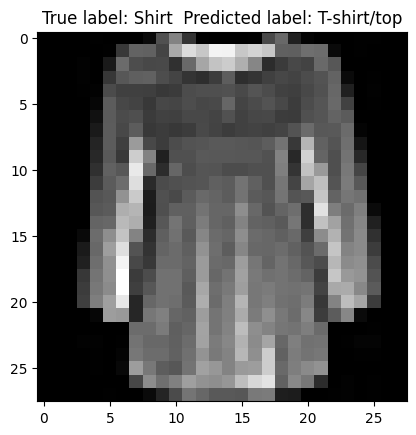

In [28]:
# misclassified prediction
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s  Predicted label: %s" % (labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True label: Pullover  Predicted label: Pullover')

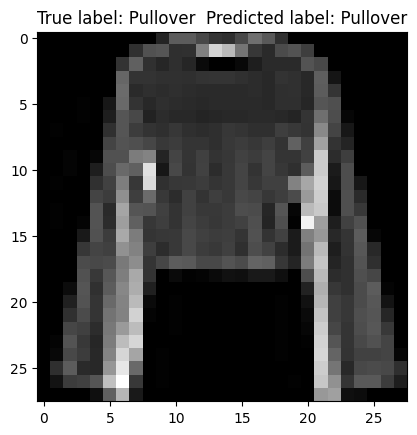

In [34]:
#correctly predicted classification
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s  Predicted label: %s" % (labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True label: Shirt  Predicted label: Shirt')

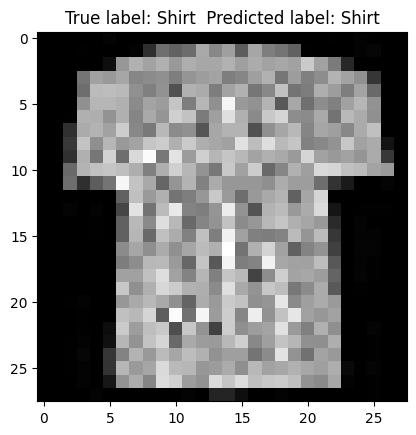

In [36]:
#Prediction
classified_idx = np.where(p_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s  Predicted label: %s" % (labels[y_test[i]], labels[p_test[i]]))